In [1]:
# Imports 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yaml

In [ ]:

# Parse Benchmark Results

INPUT_FILE = "benchmark_results.yml"

test_names: list[str] = []
native_times: list[list[float]] = []
vm_times: list[list[float]] = []

with open(INPUT_FILE) as file:
    data = yaml.safe_load(file)

for test in data:
    test_names.append(test)
    
    native, vm = zip(*data[test])
    native_times.append(list(map(float, native)))
    vm_times.append(list(map(float, vm)))

num_tests = len(test_names)

if num_tests == 0:
    print('No valid tests found!')


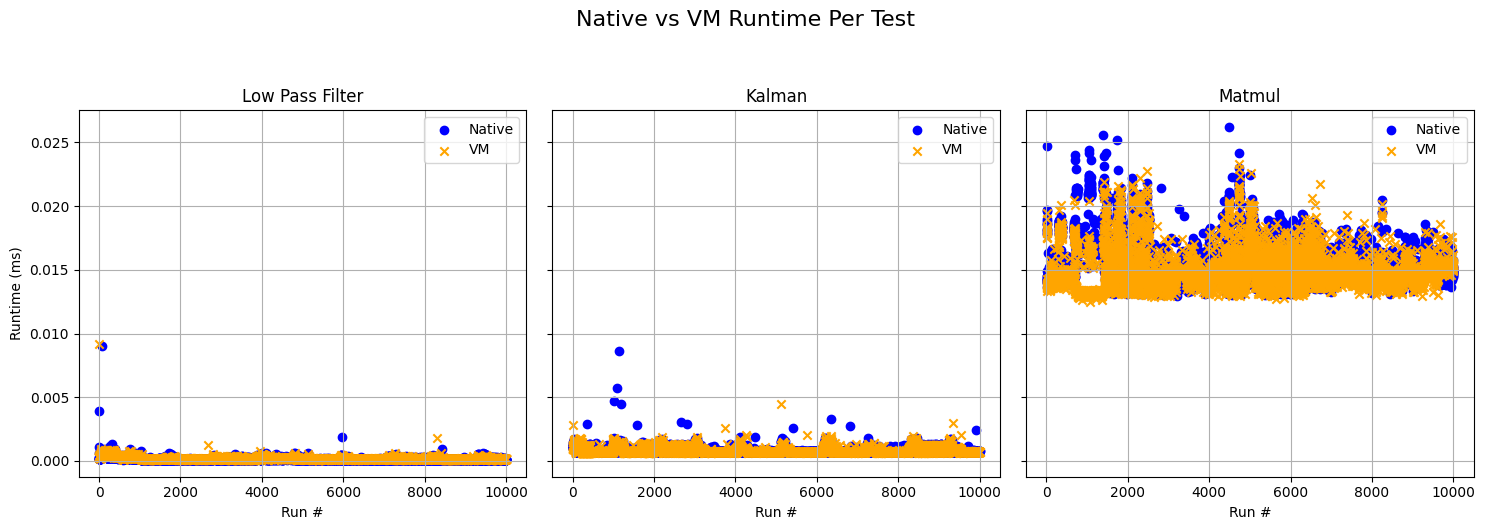

In [3]:
# Graph #1 - Native vs VM runtime per test

fig, axes = plt.subplots(1, num_tests, figsize=(5 * num_tests, 5), sharey=True)

if num_tests == 1:
    axes = [axes]

for idx, (test_name, native, vm) in enumerate(zip(test_names, native_times, vm_times)):
    ax = axes[idx]
    test_numbers = list(range(1, len(native) + 1))

    ax.scatter(test_numbers, native, color='blue', label='Native', marker='o')
    ax.scatter(test_numbers, vm, color='orange', label='VM', marker='x')

    ax.set_title(test_name)
    ax.set_xlabel("Run #")
    if idx == 0:
        ax.set_ylabel("Runtime (ms)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.suptitle("Native vs VM Runtime Per Test", fontsize=16, y=1.05)
plt.subplots_adjust(top=0.85)
plt.show()

In [6]:
# Graph #2 - Average Native vs VM runtime

def mean_confidence_interval(data_raw, confidence=0.95):
    data = np.array(data_raw)
    data_len = len(data)
    if data_len == 0:
        return 0, 0
    mean = np.mean(data)
    sem = stats.sem(data)
    if data_len == 1:
        return mean, 0
    ci = sem * stats.t.ppf((1 + confidence) / 2, data_len-1)
    return mean, ci

native_means = []
native_err = []
vm_means = []
vm_err = []

for test_native_times, test_vm_times in zip(native_times, vm_times):
    native_mean, native_ci = mean_confidence_interval(test_native_times)
    vm_mean, vm_ci = mean_confidence_interval(test_vm_times)
    
    native_means.append(native_mean)
    native_err.append(native_ci)
    vm_means.append(vm_mean)
    vm_err.append(vm_ci)


x = np.arange(num_tests)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, native_means, width, yerr=native_err, capsize=5, label='Native', color='blue')
bars2 = ax.bar(x + width/2, vm_means, width, yerr=vm_err, capsize=5, label='VM', color='orange')

ax.set_ylabel("Average Runtime (ms)")
ax.set_title("Native vs VM Runtimes")
ax.set_xticks(x)
ax.set_xticklabels(test_names)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

for i in range(num_tests):
    ax.annotate(
        f'{native_means[i]:.10f}',
        xy=(x[i] - width/2, native_means[i]),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )
    ax.annotate(
        f'{vm_means[i]:.10f}',
        xy=(x[i] + width/2, vm_means[i]),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

TypeError: the resolved dtypes are not compatible with add.reduce. Resolved (dtype('<U32'), dtype('<U32'), dtype('<U64'))